# Project 1: Navigation

## Introduction

The target of this project is to design, train and evaluate a deep reinforcement learning algorithm that enables an agent to navigate a large 3d-world. Within this 3d-world the goal is to collect as many yellow bananas as possible, while avoiding blue bananas. This environment is provided by Unity Machine Learning Agents (ML-Agents) which is an open-source Unity plugin that enables games and simulations to serve as environments for training intelligent agents.

The task of collecting yellow bananas is episodic. Once the agent is able to score an average of +13 point over 100 consecutive episodes the environment is solved.

## Implementation#

The state space of this environment has 37 dimensions. This contains the agent's velocity as well as a ray-based perception of objects around the agent's forward direction. The agent itself has four possible discrete actions to choose from: move forward, move backward, turn left and turn right.


Given a particular 37-dimensional state a suitable implementation of an agent needs to map this state to one of the four possible actions. Through learning over time the agent is expected to select actions in a way that maximizes the achieved score (sum of rewards) per episode.

### Learning Algorithm

The solution described here is based on a deep Q-network with experience replay. Utilizing a neural network for mapping states to actions is anticipated to deal well with the given state dimensionality. Even though there is a strong correlation between neighbouring rays in the state dimensions, a fully connected neural network architecture is chosen here (instead of e.g. 1d-convolutional layers). Between the 37-node input layer (state space) and the 4-node output layer (action space) two hidden layers of 64 nodes each have been shown to lead to a great learning performance. Across the two hidden layers relu activations are used.

For implementing experience replay, a buffer capable of storing up to 10,000 experience tuples is utilized. Every forth time step 64 experience tuples are randomly sampled from the buffer (given there are already at least 64 tuples in the buffer) and used to train the network. The training itself optimizes a local network with a learning rate of 0.0005 by minimizing the MSE loss between the output of the local network and the output of a target network for every experience tuple in the respective batch. Such a target network is needed to temporarily fix the target values during training. It is updated at the end of every learning cycle with an interpolation tau of 0.001 from the local network.

Future rewards are discounted by a gamma of 0.99.

Further, an epsilon-greedy policy is employed that allows for extensive exploration in the early stages of the training process. Starting at a level of 1.00, epsilon exponentially decays over time down to a level of 0.01 with a decay factor of 0.98.

### Training Results

The training is scheduled to run for up to 1,000 episodes. However, as soon as an average score of +13 is achieved over the last 100 consecutive episodes the environment is solved and the training stops. With the above described learning algorithm scores as plotted in the following graph have been achieved per episode during training.

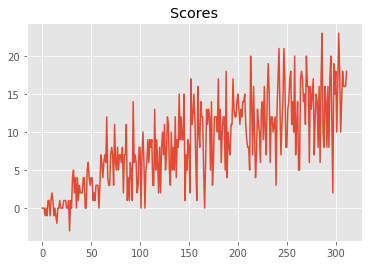

After a training of 212 episodes an average score of 13.02 was achieved by the agent. Hence, it took the agent 212 episodes to solve this environment.

## Future Work

There are apparently many ways to further improve the agent's performance. So far, for example, only a relatively small set of possible hyperparameter settings have been evaluated manually. This hyperparameter optimization process could be automated using techniques such as grid search. As part of this optimization process the network architecture (number of layers, layer type, neurons per hidden layer) and hyperparameters of the employed neural networks shall be included as well.

Further improvements are expected to be achieved by implementing the individual or combined extensions included in the rainbow variant of DQN. These are double Q-learning, prioritized replay, dueling networks, multi-step learning, distributional RL and noisy nets.